In [31]:
import numpy as np
import pickle

path = ''

with open(path+"txt_data", "rb") as fp:
    data = pickle.load(fp)
with open(path+"txt_labels", "rb") as fp:   
    labels = pickle.load(fp)

labels = np.array(labels)

print(len(data), len(labels))

31702 31702


In [32]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size = 0.30, shuffle=True, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, shuffle=True, random_state = 33)

print('split done.')

split done.


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')
vectorizer.fit(data)
x_train = vectorizer.transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()
x_valid = vectorizer.transform(x_valid).toarray()
print('> tfidVectorization done.')

> tfidVectorization done.


In [34]:
print('training set',x_train.shape)
print('testing set', x_test.shape)
print('validation set', x_valid.shape)

training set (19971, 1000)
testing set (9511, 1000)
validation set (2220, 1000)


- Simple Feed Forward Fully Conntected Neural Network

In [35]:
import keras
from keras import Sequential, Input, Model
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

x_train = np.concatenate((x_train,x_valid),axis=0)
y_train = np.concatenate((y_train,y_valid),axis=0)

scores=[]
for i in range(0,10):
  model = Sequential()
  node = 600 # number of nodes
  nLayers = 3 # number of  hidden layer
  model.add(Dense(node,input_dim=x_train.shape[1], activation='relu'))
  #model.add(Dropout(0.5))
  for i in range(0,nLayers):
    #, kernel_regularizer=keras.regularizers.l2(0.01)
    model.add(Dense(node,activation='relu' ))
    model.add(Dropout(0.5))
  model.add(Dense(9, activation='softmax'))

  model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  #x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

  history = model.fit(x_train, y_train, epochs=20, validation_split=0.1, verbose=0, use_multiprocessing=True)

  val_acc = history.history['val_accuracy']
  score = np.mean(val_acc[-4:])
  print(score)
  scores.append(score)


0.6539414376020432
0.6568693667650223
0.667117103934288
0.6573198139667511
0.654391884803772
0.6531531512737274
0.6565315276384354
0.6628378182649612
0.6624999940395355
0.6652027070522308


Train on 19971 samples, validate on 2220 samples
Epoch 1/30
 - 3s - loss: 2.1601 - accuracy: 0.1709 - val_loss: 2.0996 - val_accuracy: 0.1959
Epoch 2/30
 - 3s - loss: 2.0455 - accuracy: 0.1832 - val_loss: 1.9681 - val_accuracy: 0.2009
Epoch 3/30
 - 3s - loss: 1.9389 - accuracy: 0.1892 - val_loss: 1.8149 - val_accuracy: 0.2590
Epoch 4/30
 - 3s - loss: 1.7515 - accuracy: 0.2829 - val_loss: 1.5709 - val_accuracy: 0.3941
Epoch 5/30
 - 3s - loss: 1.5618 - accuracy: 0.3285 - val_loss: 1.4312 - val_accuracy: 0.4324
Epoch 6/30
 - 3s - loss: 1.4635 - accuracy: 0.3664 - val_loss: 1.3577 - val_accuracy: 0.4734
Epoch 7/30
 - 3s - loss: 1.3950 - accuracy: 0.4114 - val_loss: 1.2784 - val_accuracy: 0.5387
Epoch 8/30
 - 3s - loss: 1.3083 - accuracy: 0.4680 - val_loss: 1.1805 - val_accuracy: 0.5820
Epoch 9/30
 - 3s - loss: 1.2148 - accuracy: 0.5114 - val_loss: 1.0892 - val_accuracy: 0.6000
Epoch 10/30
 - 3s - loss: 1.1338 - accuracy: 0.5418 - val_loss: 1.0210 - val_accuracy: 0.6099
Epoch 11/30
 - 3s - 

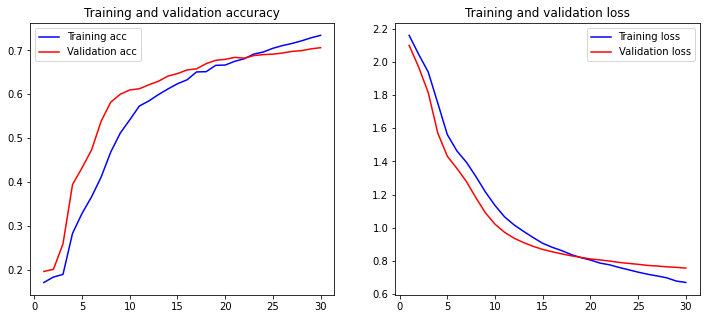

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), verbose=2, use_multiprocessing=True)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

y_pred = model.predict(x_test)


y_pred_cp = np.argmax( y_pred, axis=1)
print()
dt = pd.DataFrame(confusion_matrix(y_test, y_pred_cp))
display(dt)
print(classification_report(y_test, y_pred_cp, zero_division=0))

,0,1,2,3,4,5,6,7,8
0,884,21,47,19,46,6,11,19,7
1,17,1068,47,16,58,3,11,14,1
2,27,52,268,7,68,3,0,5,0
3,55,39,32,163,89,6,5,13,6
4,23,49,43,23,985,11,2,16,1
5,19,11,30,6,44,332,1,9,1
6,0,1,0,3,2,4,1080,145,166
7,9,12,1,4,10,3,214,976,498
8,6,5,0,0,12,2,226,472,921


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1060
           1       0.85      0.86      0.86      1235
           2       0.57      0.62      0.60       430
           3       0.68      0.40      0.50       408
           4       0.75      0.85      0.80      1153
           5       0.90      0.73      0.81       453
           6       0.70      0.77      0.73      1401
           7       0.58      0.57      0.57      1727
           8       0.58      0.56      0.57      1644

    accuracy                           0.70      9511
   macro avg       0.72      0.69      0.70      9511
weighted avg       0.70      0.70      0.70      9511



In [ ]:
import pickle

with open('CLF_ANN_text','wb') as f:
  pickle.dump(model,f)

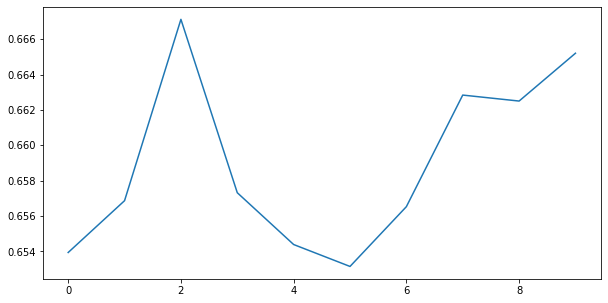

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(scores)
plt.show()

In [41]:
with open('ANN_score','wb') as f:
  pickle.dump(scores,f)